# A First Look at an X-ray Image Dataset

Images are data. They can be 2D, from cameras, or 1D, from spectrographs, or 3D, from IFUs (integral field units). In each case, the data come packaged as an *array* of numbers, which we can visualize, and do calculations with.

Let's suppose we are interested in clusters of galaxies. We choose one, Abell 1835, and propose to observe it with the XMM-Newton space telescope. We are successful, we design the observations, and they are taken for us. Next: we download the data, and take a look at it.

## Getting the Data 

We will download our images from HEASARC, the online archive where XMM data are stored. 

In [1]:
from __future__ import print_function
import astropy.io.fits as pyfits
import numpy as np
import os
import urllib
import astropy.visualization as viz
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)

Download the example data files if we don't already have them.

In [2]:
targdir = 'a1835_xmm'
if not os.path.isdir(targdir):
    os.mkdir()

filenames = ('P0098010101M2U009IMAGE_3000.FTZ', 
             'P0098010101M2U009EXPMAP3000.FTZ',
             'P0098010101M2X000BKGMAP3000.FTZ')

remotedir = 'http://heasarc.gsfc.nasa.gov/FTP/xmm/data/rev0/0098010101/PPS/'

for filename in filenames:
    path = os.path.join(targdir, filename)
    url = os.path.join(remotedir, filename)
    if not os.path.isfile(path):
        urllib.urlretrieve(url, path)

imagefile, expmapfile, bkgmapfile = [os.path.join(targdir, filename) for filename in filenames]
        
for filename in os.listdir(targdir):
    print('{0:>10.2f} KB   {1}'.format(os.path.getsize(os.path.join(targdir, filename))/1024.0, filename))

      0.46 KB   M2ptsrc.txt
    461.45 KB   P0098010101M2U009EXPMAP3000.FTZ
     45.65 KB   P0098010101M2U009IMAGE_3000.FTZ
    470.63 KB   P0098010101M2X000BKGMAP3000.FTZ


## The XMM MOS2 image

Let's find the "science" image taken with the MOS2 camera, and display it.

In [3]:
imfits = pyfits.open(imagefile)
imfits.info()

Filename: a1835_xmm/P0098010101M2U009IMAGE_3000.FTZ
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     262   (648, 648)   int32   
1    GTI00006    BinTableHDU     29   15R x 2C     [D, D]   
2    GTI00106    BinTableHDU     29   15R x 2C     [D, D]   
3    GTI00206    BinTableHDU     29   16R x 2C     [D, D]   
4    GTI00306    BinTableHDU     29   15R x 2C     [D, D]   
5    GTI00406    BinTableHDU     29   15R x 2C     [D, D]   
6    GTI00506    BinTableHDU     29   15R x 2C     [D, D]   
7    GTI00606    BinTableHDU     29   15R x 2C     [D, D]   


`imfits` is a FITS object, containing multiple data structures. The image itself is an array of integer type, and size 648x648 pixels, stored in the primary "header data unit" or HDU. 

> _If we need it to be floating point for some reason, we need to cast it:
im = imfits[0].data.astype('np.float32')
Note that this (probably?) prevents us from using the pyfits "writeto" method to save any changes. Assuming the integer type is ok, just get a pointer to the image data._

Accessing the `.data` member of the FITS object returns the image data as a numpy ndarray.

In [4]:
im = imfits[0].data

Let's look at this with `ds9`. 

In [12]:
!ds9 -log "$imagefile"

> _If you don't have the image viewing tool `ds9`, you should install it - it's very useful astronomical software. You can download it (later!) from [this webpage](http://ds9.si.edu/site/Download.html)._

We can also display the image in the notebook: 

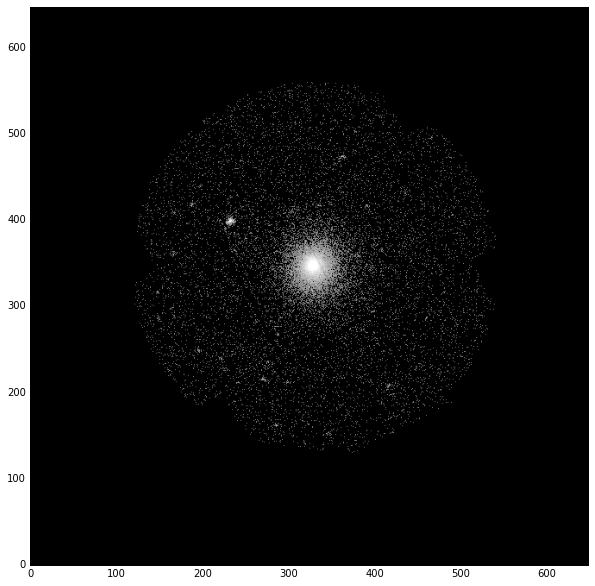

In [13]:
plt.imshow(viz.scale_image(im, scale='log', max_cut=40), cmap='gray', origin='lower');
plt.savefig("figures/cluster_image.png")

-----
## Exercise

What is going on in this image? 

Make a list of everything that is interesting about this image with your neighbor, and we'll discuss the features you identify in about 5 minutes time.

-----

Just to prove that images really are arrays of numbers:

In [16]:
im[350:359,350:359]

array([[2, 2, 3, 2, 2, 2, 1, 0, 0],
       [0, 5, 1, 1, 0, 4, 0, 3, 3],
       [3, 2, 2, 1, 2, 2, 1, 2, 2],
       [2, 3, 2, 2, 1, 1, 2, 0, 2],
       [2, 3, 1, 1, 2, 0, 0, 3, 1],
       [2, 2, 3, 1, 2, 1, 3, 2, 2],
       [1, 1, 1, 0, 1, 1, 2, 0, 1],
       [6, 3, 0, 1, 3, 1, 3, 1, 0],
       [1, 2, 0, 1, 0, 0, 1, 2, 1]], dtype=int32)

In [6]:
index = np.unravel_index(im.argmax(), im.shape)
print("image dimensions:",im.shape)
print("location of maximum pixel value:",index)
print("maximum pixel value: ",im[index])

image dimensions: (648, 648)
location of maximum pixel value: (348, 328)
maximum pixel value:  223


> _NB. Images read in with pyfits are indexed with eg `im[y,x]`: ds9 shows that the maximum pixel value is at "image coordinates" `x=328, y=348`. `pyplot` knows what to do, but sometimes we may need to take the transpose of the `im` array. What `pyplot` does need to be told is that in astronomy, the origin of the image is conventionally taken to be at the bottom left hand corner, not the top left hand corner. That's what the `origin=lower` in the `plt.imshow` command was about._

> _We will work in image coordinates throughout this course, for simplicity. Aligning images on the sky via a "World Coordinate System" is something to be learned elsewhere._